In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2023-04-17 20:43:19.472637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Need to install this into the env i.e. tensorflow env or pytorch env
#!pip install ipython-autotime
%load_ext autotime

time: 437 µs (started: 2023-04-17 20:43:22 +05:30)


In [3]:
print(tf.__version__)

2.12.0
time: 410 µs (started: 2023-04-17 20:43:24 +05:30)


In [4]:
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')
print("GPU(s) : " + str(gpus))
print("CPU(s) : " + str(cpus))
# if len(gpus) > 0:
#     print("Setting up to use GPU")
#     tf.config.set_visible_devices(gpus[0], 'GPU')
# else:
#     print("Setting up to use CPU")
#     tf.config.set_visible_devices(cpus[0], 'CPU')  # this doesn't work if you have a GPU which is visible to TensorFlow

if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
    try:
        tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

GPU(s) : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU(s) : [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
1 Physical GPUs, 1 Logical GPUs
time: 690 ms (started: 2023-04-17 20:43:27 +05:30)


2023-04-17 20:43:27.551016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-17 20:43:27.570330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-17 20:43:27.570538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
N = 50
x = tf.random.normal(shape = (N, 1), mean=1, stddev=1, dtype=tf.float32, seed=None,  name=None)
y = 3*x + tf.random.normal(shape = (N, 1), mean=1, stddev=1, dtype=tf.float32, seed=None,  name=None)

time: 56.5 ms (started: 2023-04-17 20:43:44 +05:30)


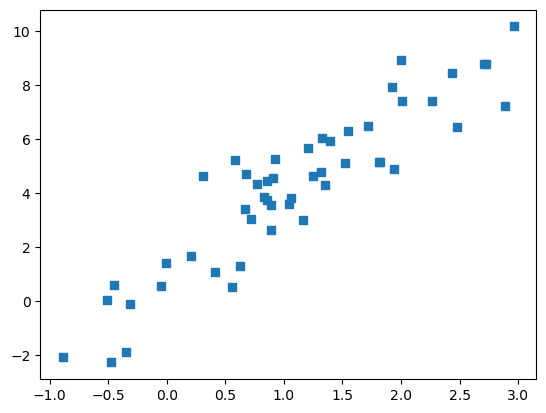

time: 181 ms (started: 2023-04-17 20:43:52 +05:30)


In [6]:
plt.plot(x, y, 's')
plt.show()

In [7]:
model = keras.Sequential([
      keras.layers.Dense(1, use_bias=True, input_shape=(1,))
    ])

time: 52.3 ms (started: 2023-04-17 20:43:53 +05:30)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
time: 8.59 ms (started: 2023-04-17 20:43:55 +05:30)


In [9]:
# Adam optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
  
# Model compiling settings
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

time: 11.9 ms (started: 2023-04-17 20:43:56 +05:30)


In [10]:
epochs = 500
history = model.fit(x, y, epochs=epochs, verbose=0)

2023-04-17 20:44:00.682093: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f002801d5b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-17 20:44:00.682114: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2023-04-17 20:44:00.846612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8801
2023-04-17 20:44:01.004532: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


time: 4.74 s (started: 2023-04-17 20:43:59 +05:30)


In [11]:
predictions = model(x)

time: 7.63 ms (started: 2023-04-17 20:44:06 +05:30)


In [12]:
testloss = tf.reduce_mean((predictions - y)*(predictions - y))

time: 4.64 ms (started: 2023-04-17 20:44:08 +05:30)


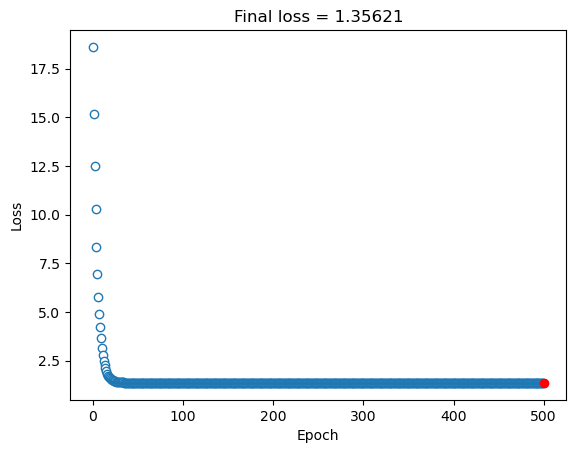

time: 162 ms (started: 2023-04-17 20:44:09 +05:30)


In [13]:
# Returning the desired values for plotting and turn to numpy array
mse = np.asarray(history.history['mse'])
plt.plot(mse, 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(epochs, testloss, 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# item() returns only the value, not a tensor
plt.title('Final loss = %g' %testloss)
plt.show()

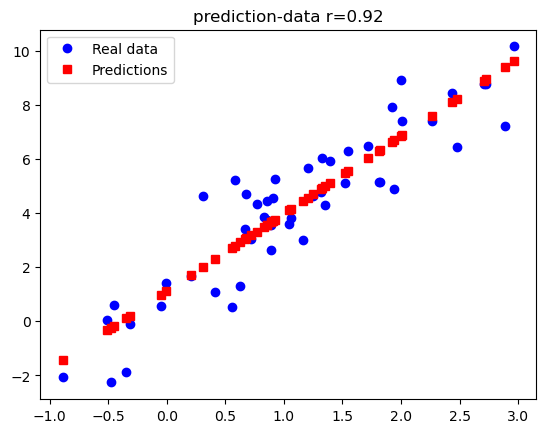

time: 192 ms (started: 2023-04-17 20:44:12 +05:30)


In [14]:
# plot the data
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions, 'rs', label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(tf.transpose(y), tf.transpose(predictions))[0, 1]:.2f}')
plt.legend()
plt.show()